# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import datetime

! pip install jaconv
import jaconv

# Japanese font setting
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

# figure size setting
mpl.rcParams['figure.figsize'] = [12.0, 4.0]

HOUR = 24

# read file

In [2]:
df = pd.read_table('../../../data/patient/ICU_patient_info_summarized4_-24h_{}h.txt'.format(HOUR), low_memory=False)
df

,pID,Age,Sex,Blood_ABO,Blood_Rh,department,height,weight,Ent_datetime,Exit_datetime,...,bed_ER1,bed_ER2,bed_Emergency5,bed_Emergency8,bed_Emergency10,bed_Temporary1,bed_Temporary2,bed_Emergency_Temporary1,bed_Emergency_Temporary2,bed_Emergency_Temporary3
0,NaN,75.0,M,O,Rh_+,肝胆膵外科,162.9,65.0,2010-11-03 11:52,2010-11-30 11:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,72.0,M,A,Rh_+,救急科,NaN,67.3,2010-11-03 13:14,2010-11-21 14:39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,40.0,M,O,Rh_+,肝胆膵外科,174.0,70.6,2010-11-03 14:19,2010-12-28 16:44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,62.0,M,O,Rh_+,消化器内科,NaN,65.8,2010-11-03 13:22,2010-11-12 17:22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,67.0,F,A,Rh_+,救急科,NaN,64.3,2010-11-03 13:37,2010-11-08 17:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16166,NaN,69.0,F,NaN,NaN,救急科,NaN,NaN,2019-03-30 21:30,2019-03-31 13:50,...,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16167,NaN,45.0,M,A,Rh_+,循環器内科,175.0,96.6,2019-03-30 22:02,2019-04-01 10:15,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16168,NaN,76.0,M,B,Rh_+,食道・胃腸外科,NaN,NaN,2019-03-31 07:04,2019-04-01 01:38,...,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16169,NaN,72.0,M,A,Rh_+,消化器内科,171.5,87.5,2019-03-31 10:10,2019-04-01 13:52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.days_of_stay.isnull().sum()

14

# merge pID

In [4]:
df_key = pd.read_table('../../../data/patient/ICU_patient_info_summarized_anonym.txt', low_memory=False)
df_key

,pID,Age,Sex,Blood_ABO,Blood_Rh,department,height,weight,Ent_date,Ent_time,...,ART_2d,PAPm,SVV_Vigileo,rSO2-1_INVOS,rSO2-2_INVOS,rSO2-3_INVOS,rSO2-4_INVOS,TBlood,SVV,ScvO2
0,9AYeq8l9,75.0,M,O,Rh_+,肝胆膵外科,162.9,65.0,2010-11-03,1152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2vKAer03,72.0,M,A,Rh_+,救急科,NaN,67.3,2010-11-03,1314.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9RrpqrB9,40.0,M,O,Rh_+,肝胆膵外科,174.0,70.6,2010-11-03,1419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ng4x4Kj9,62.0,M,O,Rh_+,消化器内科,NaN,65.8,2010-11-03,1322.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nq185Pxn,67.0,F,A,Rh_+,救急科,NaN,64.3,2010-11-03,1337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16166,37vywE02,69.0,F,NaN,NaN,救急科,NaN,NaN,2019-03-30,2130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16167,9EDo4eEn,45.0,M,A,Rh_+,循環器内科,175.0,96.6,2019-03-30,2202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16168,2bpBvNan,76.0,M,B,Rh_+,食道・胃腸外科,NaN,NaN,2019-03-31,704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16169,2D7Klge9,72.0,M,A,Rh_+,消化器内科,171.5,87.5,2019-03-31,1010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_key['Ent_datetime'] = ''
df_key['Exit_datetime'] = ''

a = df_key[['Ent_date','Ent_time','Exit_date','Exit_time']].values
b1 = [0] * len(a)
b2 = [0] * len(a)
for i in range(len(a)):
    if a[i][0] is not np.nan and a[i][1] is not np.nan:
        b1[i] = '{} {:02d}:{:02d}'.format(a[i][0], int(a[i][1]) // 100,int(a[i][1]) % 100)
    else:
        b1[i] = None
    if a[i][2] is not np.nan and a[i][3] is not np.nan:
        b2[i] = '{} {:02d}:{:02d}'.format(a[i][2], int(a[i][3]) // 100, int(a[i][3]) % 100)
    else:
        b2[i] = None
df_key.Ent_datetime = b1
df_key.Exit_datetime = b2

df_key

,pID,Age,Sex,Blood_ABO,Blood_Rh,department,height,weight,Ent_date,Ent_time,...,SVV_Vigileo,rSO2-1_INVOS,rSO2-2_INVOS,rSO2-3_INVOS,rSO2-4_INVOS,TBlood,SVV,ScvO2,Ent_datetime,Exit_datetime
0,9AYeq8l9,75.0,M,O,Rh_+,肝胆膵外科,162.9,65.0,2010-11-03,1152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-03 11:52,2010-11-30 11:42
1,2vKAer03,72.0,M,A,Rh_+,救急科,NaN,67.3,2010-11-03,1314.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-03 13:14,2010-11-21 14:39
2,9RrpqrB9,40.0,M,O,Rh_+,肝胆膵外科,174.0,70.6,2010-11-03,1419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-03 14:19,2010-12-28 16:44
3,ng4x4Kj9,62.0,M,O,Rh_+,消化器内科,NaN,65.8,2010-11-03,1322.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-03 13:22,2010-11-12 17:22
4,nq185Pxn,67.0,F,A,Rh_+,救急科,NaN,64.3,2010-11-03,1337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-03 13:37,2010-11-08 17:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16166,37vywE02,69.0,F,NaN,NaN,救急科,NaN,NaN,2019-03-30,2130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-30 21:30,2019-03-31 13:50
16167,9EDo4eEn,45.0,M,A,Rh_+,循環器内科,175.0,96.6,2019-03-30,2202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-30 22:02,2019-04-01 10:15
16168,2bpBvNan,76.0,M,B,Rh_+,食道・胃腸外科,NaN,NaN,2019-03-31,704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-31 07:04,2019-04-01 01:38
16169,2D7Klge9,72.0,M,A,Rh_+,消化器内科,171.5,87.5,2019-03-31,1010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-31 10:10,2019-04-01 13:52


In [6]:
sort_cols = ['Ent_datetime','Exit_datetime','Age','Sex']
df2 = pd.concat([df_key.sort_values(sort_cols)[['pID']],df.sort_values(sort_cols).drop('pID',axis=1)],axis=1)
df2

,pID,Age,Sex,Blood_ABO,Blood_Rh,department,height,weight,Ent_datetime,Exit_datetime,...,bed_ER1,bed_ER2,bed_Emergency5,bed_Emergency8,bed_Emergency10,bed_Temporary1,bed_Temporary2,bed_Emergency_Temporary1,bed_Emergency_Temporary2,bed_Emergency_Temporary3
0,9AYeq8l9,75.0,M,O,Rh_+,肝胆膵外科,162.9,65.0,2010-11-03 11:52,2010-11-30 11:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2vKAer03,72.0,M,A,Rh_+,救急科,NaN,67.3,2010-11-03 13:14,2010-11-21 14:39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9RrpqrB9,40.0,M,O,Rh_+,肝胆膵外科,174.0,70.6,2010-11-03 14:19,2010-12-28 16:44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ng4x4Kj9,62.0,M,O,Rh_+,消化器内科,NaN,65.8,2010-11-03 13:22,2010-11-12 17:22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nq185Pxn,67.0,F,A,Rh_+,救急科,NaN,64.3,2010-11-03 13:37,2010-11-08 17:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16166,37vywE02,69.0,F,NaN,NaN,救急科,NaN,NaN,2019-03-30 21:30,2019-03-31 13:50,...,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16167,9EDo4eEn,45.0,M,A,Rh_+,循環器内科,175.0,96.6,2019-03-30 22:02,2019-04-01 10:15,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16168,2bpBvNan,76.0,M,B,Rh_+,食道・胃腸外科,NaN,NaN,2019-03-31 07:04,2019-04-01 01:38,...,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16169,2D7Klge9,72.0,M,A,Rh_+,消化器内科,171.5,87.5,2019-03-31 10:10,2019-04-01 13:52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df2

# columns

In [8]:
df.columns.values

array(['pID', 'Age', 'Sex', 'Blood_ABO', 'Blood_Rh', 'department',
       'height', 'weight', 'Ent_datetime', 'Exit_datetime',
       'days_of_stay', 'Ent_diagnosis', 'Current_diagnosis',
       'body_restraint', 'ambulance', 'introduction', 'MET', 'Ent_route',
       'AIDS', 'AML_MM', 'Heart_failure', 'Lymphoma',
       'Respiratory_failure', 'Metastasis', 'Liver_failure',
       'Immunosuppression', 'Cirrhosis', 'Maintenance_dialysis',
       'Cardiac_arrest_resuscitation', 'Accute_DIC', 'SOFA_score',
       'apache2_score', 'apache2_est_mortality', 'SIRS_score',
       'FIM_score', 'outcome1', 'outcome2', 'Severity_of_sepsis', 'GOT',
       'GPT', 'LDH', 'ALP', 'G-GTP', 'CHE', 'AMY', 'CPK', 'TP ', 'Alb',
       'UA', 'UN', 'CRE', 'T-Bil', 'Na', 'K', 'Cl', 'Ca', 'T-CHO', 'CRP',
       'ammonia', 'APTT', 'PT-SEC', 'PT-PER', 'PT-INR', 'WBC', 'RBC',
       'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT', 'PCT', 'MPV',
       'PDW', 'FDP', 'AT3', 'ST', 'SEG', 'EO', 'BA', 'MO', 'LY',
   

In [9]:
# columns all rows are NaN
cols = []
for col in df.columns:
    if df[col].isnull().sum() == len(df):
        cols.append(col)
print(cols)
df.drop(cols, axis=1, inplace=True)

['bed_Emergency_Temporary3']


In [10]:
df.columns.values

array(['pID', 'Age', 'Sex', 'Blood_ABO', 'Blood_Rh', 'department',
       'height', 'weight', 'Ent_datetime', 'Exit_datetime',
       'days_of_stay', 'Ent_diagnosis', 'Current_diagnosis',
       'body_restraint', 'ambulance', 'introduction', 'MET', 'Ent_route',
       'AIDS', 'AML_MM', 'Heart_failure', 'Lymphoma',
       'Respiratory_failure', 'Metastasis', 'Liver_failure',
       'Immunosuppression', 'Cirrhosis', 'Maintenance_dialysis',
       'Cardiac_arrest_resuscitation', 'Accute_DIC', 'SOFA_score',
       'apache2_score', 'apache2_est_mortality', 'SIRS_score',
       'FIM_score', 'outcome1', 'outcome2', 'Severity_of_sepsis', 'GOT',
       'GPT', 'LDH', 'ALP', 'G-GTP', 'CHE', 'AMY', 'CPK', 'TP ', 'Alb',
       'UA', 'UN', 'CRE', 'T-Bil', 'Na', 'K', 'Cl', 'Ca', 'T-CHO', 'CRP',
       'ammonia', 'APTT', 'PT-SEC', 'PT-PER', 'PT-INR', 'WBC', 'RBC',
       'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT', 'PCT', 'MPV',
       'PDW', 'FDP', 'AT3', 'ST', 'SEG', 'EO', 'BA', 'MO', 'LY',
   

# numeric colums

In [11]:
cols_numeric = df.columns.values.tolist()
cols_numeric.remove('pID')

# category columns

In [12]:
# initialize
cols_category = []

## Sex

M      9721
F      5779
NaN     671
Name: Sex, dtype: int64


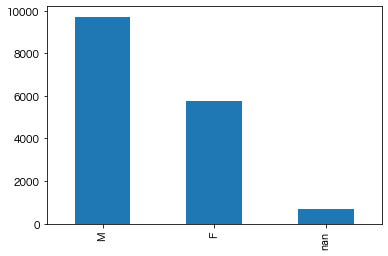

In [13]:
print(df.Sex.value_counts(dropna=False))
df.Sex.value_counts(dropna=False).plot.bar()

In [14]:
# add dummy variable
df_dummy = pd.get_dummies(df.Sex, prefix='Sex', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [15]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Sex')

## Blood_ABO	

A      4932
O      4165
B      3032
NaN    2707
AB     1299
移        31
その他       5
Name: Blood_ABO, dtype: int64


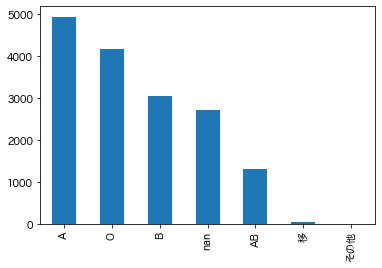

In [16]:
print(df.Blood_ABO.value_counts(dropna=False))
df.Blood_ABO.value_counts(dropna=False).plot.bar()

In [17]:
# to En
df.loc[df.Blood_ABO == '移', 'Blood_ABO'] = 't'
df.loc[df.Blood_ABO == 'その他', 'Blood_ABO'] = 'other'

In [18]:
# add dummy variable
df_dummy = pd.get_dummies(df.Blood_ABO, prefix='Blood_ABO', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [19]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Blood_ABO')

## Blood_Rh

Rh_+    13384
NaN      2709
Rh_-       78
Name: Blood_Rh, dtype: int64


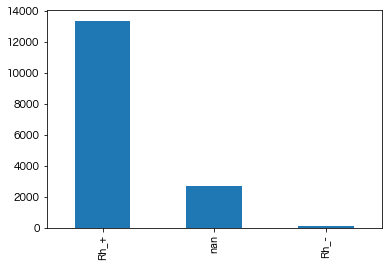

In [20]:
print(df.Blood_Rh.value_counts(dropna=False))
df.Blood_Rh.value_counts(dropna=False).plot.bar()

In [21]:
# add dummy variable
df_dummy = pd.get_dummies(df.Blood_Rh, prefix='Blood_Rh', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [22]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Blood_Rh')

## department

救急科             3289
循環器内科           2809
心臓血管外科          2415
脳神経外科           1793
肝胆膵外科           1405
食道・胃腸外科         1069
NaN              686
歯科・顎・口腔外科        449
耳鼻咽喉・頭頚部外科       415
整形外科             275
泌尿器科             173
形成・美容外科          170
小児科              167
血液内科             151
呼吸器外科            138
消化器内科            132
呼吸器内科            112
婦人科               99
脳神経内科             76
小児外科              74
人工腎臓部             69
アレルギー・膠原病内科       59
周産期・母性科           37
糖尿病・代謝・内分泌内科      21
皮膚科               19
精神神経科             19
乳腺・甲状腺外科          12
腎臓内科              11
臨床腫瘍部              7
感染症内科              7
放射線科               4
眼科                 4
集中治療部              2
冠動脈疾患治療部           2
麻酔・疼痛・緩和医療科        1
Name: department, dtype: int64


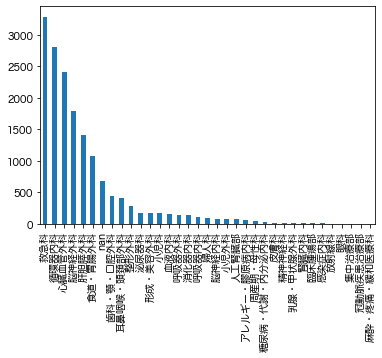

In [23]:
print(df.department.value_counts(dropna=False))
df.department.value_counts(dropna=False).plot.bar()

In [24]:
# to En
df.loc[df.department == '救急科', 'department'] = 'Emergency'
df.loc[df.department == '循環器内科', 'department'] = 'Cardiology'
df.loc[df.department == '心臓血管外科', 'department'] = 'Cardiovascular_surgery'
df.loc[df.department == '脳神経外科', 'department'] = 'Neurosurgery'
df.loc[df.department == '肝胆膵外科', 'department'] = 'Hepatobiliary_pancreatic_surgery'
df.loc[df.department == '食道・胃腸外科', 'department'] = 'Esophageal_gastrointestinal_surgery'
df.loc[df.department == '歯科・顎・口腔外科', 'department'] = 'Dentistry_jaw_oral_surgery'
df.loc[df.department == '耳鼻咽喉・頭頚部外科', 'department'] = 'Otolaryngology_Head_and_Neck_Surgery'
df.loc[df.department == '整形外科', 'department'] = 'Orthopedics'
df.loc[df.department == '泌尿器科', 'department'] = 'Urology'
df.loc[df.department == '形成・美容外科', 'department'] = 'Plastic_surgery'
df.loc[df.department == '小児科', 'department'] = 'Pediatrics'
df.loc[df.department == '血液内科', 'department'] = 'Hematology'
df.loc[df.department == '呼吸器外科', 'department'] = 'Respiratory_surgery'
df.loc[df.department == '消化器内科', 'department'] = 'Gastroenterology'
df.loc[df.department == '呼吸器内科', 'department'] = 'Respiratory_medicine'
df.loc[df.department == '婦人科', 'department'] = 'Gynecology'
df.loc[df.department == '脳神経内科', 'department'] = 'Neurology'
df.loc[df.department == '小児外科', 'department'] = 'Pediatric_surgery'
df.loc[df.department == '人工腎臓部', 'department'] = 'Artificial_kidney'
df.loc[df.department == 'アレルギー・膠原病内科', 'department'] = 'Internal_Medicine_for_Allergies_and_Collagen_Diseases'
df.loc[df.department == '周産期・母性科', 'department'] = 'Perinatal_maternity'
df.loc[df.department == '糖尿病・代謝・内分泌内科', 'department'] = 'Diabetes_Metabolism_Endocrinology'
df.loc[df.department == '精神神経科', 'department'] = 'Psychiatry'
df.loc[df.department == '皮膚科', 'department'] = 'Dermatology'
df.loc[df.department == '乳腺・甲状腺外科', 'department'] = 'Breast and thyroid_surgery'
df.loc[df.department == '腎臓内科', 'department'] = 'Nephrology'
df.loc[df.department == '臨床腫瘍部', 'department'] = 'Clinical_tumor'
df.loc[df.department == '感染症内科', 'department'] = 'Infectious_Disease_Internal_Medicine'
df.loc[df.department == '眼科', 'department'] = 'Ophthalmology'
df.loc[df.department == '放射線科', 'department'] = 'Radiology'
df.loc[df.department == '冠動脈疾患治療部', 'department'] = 'Coronary_artery_disease_treatment '
df.loc[df.department == '集中治療部', 'department'] = 'Intensive_care_unit'
df.loc[df.department == '麻酔・疼痛・緩和医療科', 'department'] = 'Anesthesia_Pain_Palliative_Medicine'

In [25]:
# add dummy variable
df_dummy = pd.get_dummies(df.department, prefix='department', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [26]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('department')

## Ent_datetime

In [27]:
# add dummy variable
df['Ent_time1'] = 0
df['Ent_time2'] = 0
df['Ent_time3'] = 0

a = df.Ent_datetime.values
b1 = [0] * len(a)
b2 = [0] * len(a)
b3 = [0] * len(a)
for i in range(len(a)):
    if a[i] != a[i]:
        continue
    int_time = int(a[i][11:13] + a[i][14:16])
    if 900 <= int_time and int_time < 1700:
        b1[i] = 1
    elif 1700 <= int_time or int_time < 100:
        b2[i] = 1
    elif 100 <= int_time and int_time < 900:
        b3[i] = 1

df.Ent_time1 = b1
df.Ent_time2 = b2
df.Ent_time3 = b3

In [28]:
cols_category.extend(['Ent_time1', 'Ent_time2', 'Ent_time3'])
cols_numeric.remove('Ent_datetime')

## Exit_datetime

In [29]:
cols_numeric.remove('Exit_datetime')

## Ent_diagnosis

In [30]:
print(df.Ent_diagnosis.value_counts(dropna=False))

NaN                         9983
うっ血性心不全                      102
急性心筋梗塞                        87
食道癌                           75
不安定狭心症                        71
                            ... 
慢性腎不全，CABG術後，慢性感染              1
頚椎後縦靱帯骨化症，間質性肺炎，ペースメーカー心       1
播種性血管内凝固、四肢紫斑、リンパ腫治療後          1
内頚動脈瘤術後                        1
TAA・BAV                        1
Name: Ent_diagnosis, Length: 3634, dtype: int64


In [31]:
# to En
df.loc[df.Ent_diagnosis == 'うっ血性心不全', 'Ent_diagnosis'] = 'Congestive_heart_failure'
df.loc[df.Ent_diagnosis == '心不全', 'Ent_diagnosis'] = 'heart_failure'
df.loc[df.Ent_diagnosis == '肺炎', 'Ent_diagnosis'] = 'pneumonia'
df.loc[df.Ent_diagnosis == '急性心筋梗塞', 'Ent_diagnosis'] = 'Acute_myocardial_infarction'
# df.loc[df.Ent_diagnosis == 'AS', 'Ent_diagnosis'] = 'AS'
df.loc[df.Ent_diagnosis == '呼吸不全', 'Ent_diagnosis'] = 'Respiratory_failure'
df.loc[df.Ent_diagnosis == '大動脈弁狭窄症', 'Ent_diagnosis'] = 'Aortic_stenosis'
df.loc[df.Ent_diagnosis == '食道癌', 'Ent_diagnosis'] = 'Esophageal_cancer'
df.loc[df.Ent_diagnosis == '不安定狭心症', 'Ent_diagnosis'] = 'Unstable_angina'
df.loc[df.Ent_diagnosis == '敗血症性ｼｮｯｸ', 'Ent_diagnosis'] = 'Septic_shock'
df.loc[df.Ent_diagnosis == '慢性腎不全', 'Ent_diagnosis'] = 'Chronic_renal_failure'
# df.loc[df.Ent_diagnosis == 'MR', 'Ent_diagnosis'] = 'MR'
df.loc[df.Ent_diagnosis == '食道癌術後', 'Ent_diagnosis'] = 'Postoperative_esophageal_cancer'
df.loc[df.Ent_diagnosis == '意識障害', 'Ent_diagnosis'] = 'Disturbance_of_consciousness'
df.loc[df.Ent_diagnosis == '誤嚥性肺炎', 'Ent_diagnosis'] = 'Aspiration pneumonia'
df.loc[df.Ent_diagnosis == '急性腎不全', 'Ent_diagnosis'] = 'Acute_renal_failure'
df.loc[df.Ent_diagnosis == '狭心症', 'Ent_diagnosis'] = 'Angina'
df.loc[df.Ent_diagnosis == '出血性ｼｮｯｸ', 'Ent_diagnosis'] = 'Hemorrhagic_shock'
df.loc[df.Ent_diagnosis == '胸部大動脈瘤', 'Ent_diagnosis'] = 'Thoracic_aortic_aneurysm'
# df.loc[df.Ent_diagnosis == 'AMI', 'Ent_diagnosis'] = 'AMI'
df.loc[df.Ent_diagnosis == 'くも膜下出血', 'Ent_diagnosis'] = 'subarachnoid_hemorrhage'
df.loc[df.Ent_diagnosis == '脳梗塞', 'Ent_diagnosis'] = 'cerebral_infarction'
df.loc[df.Ent_diagnosis == '重症急性膵炎', 'Ent_diagnosis'] = 'Severe_acute_pancreatitis'
df.loc[df.Ent_diagnosis == '僧帽弁閉鎖不全症', 'Ent_diagnosis'] = 'Mitral_regurgitation'
df.loc[df.Ent_diagnosis == 'OHCA', 'Ent_diagnosis'] = 'OHCA'
df.loc[df.Ent_diagnosis == '骨盤骨折', 'Ent_diagnosis'] = 'Pelvic_fracture'
df.loc[df.Ent_diagnosis == '膵頭部癌', 'Ent_diagnosis'] = 'Pancreatic_head_cancer'
df.loc[df.Ent_diagnosis == '腹部大動脈瘤', 'Ent_diagnosis'] = 'Abdominal_aortic_aneurysm'
df.loc[df.Ent_diagnosis == '脳腫瘍', 'Ent_diagnosis'] = 'Brain_tumor'
df.loc[df.Ent_diagnosis == '急性呼吸不全', 'Ent_diagnosis'] = 'Acute_respiratory_failure'
df.loc[df.Ent_diagnosis == '髄膜腫', 'Ent_diagnosis'] = 'Meningioma'
df.loc[df.Ent_diagnosis == '脳挫傷', 'Ent_diagnosis'] = 'Brain_contusion'
df.loc[df.Ent_diagnosis == '下垂体腺腫', 'Ent_diagnosis'] = 'Pituitary_adenoma'
df.loc[df.Ent_diagnosis == '膵癌', 'Ent_diagnosis'] = 'Pancreatic_cancer'
df.loc[df.Ent_diagnosis == '急性心不全', 'Ent_diagnosis'] = 'Acute_heart_failure'
df.loc[df.Ent_diagnosis == '心肺停止蘇生後', 'Ent_diagnosis'] = 'After_cardiopulmonary_arrest_resuscitation'
df.loc[df.Ent_diagnosis == '心室頻拍', 'Ent_diagnosis'] = 'Ventricular_tachycardia'
df.loc[df.Ent_diagnosis == '上部消化管出血', 'Ent_diagnosis'] = 'Upper_gastrointestinal_bleeding'
# df.loc[df.Ent_diagnosis == 'TR', 'Ent_diagnosis'] = 'TR'
df.loc[df.Ent_diagnosis == '急性薬物中毒', 'Ent_diagnosis'] = 'Acute_drug_addiction'
df.loc[df.Ent_diagnosis == '腎不全', 'Ent_diagnosis'] = 'kidney_failure'
df.loc[df.Ent_diagnosis == '心筋梗塞', 'Ent_diagnosis'] = 'Myocardial_infarction'
df.loc[df.Ent_diagnosis == '脳出血', 'Ent_diagnosis'] = 'cerebral_hemorrhage'
# df.loc[df.Ent_diagnosis == 'AR', 'Ent_diagnosis'] = 'AR'
# df.loc[df.Ent_diagnosis == 'AF', 'Ent_diagnosis'] = 'AF'
# df.loc[df.Ent_diagnosis == 'TAA', 'Ent_diagnosis'] = 'TAA'
df.loc[df.Ent_diagnosis == '敗血症', 'Ent_diagnosis'] = 'Sepsis'
# df.loc[df.Ent_diagnosis == 'CAD', 'Ent_diagnosis'] = 'CAD'
df.loc[df.Ent_diagnosis == '舌癌', 'Ent_diagnosis'] = 'Tongue_cancer'
df.loc[df.Ent_diagnosis == '大動脈弁閉鎖不全症', 'Ent_diagnosis'] = 'Aortic_regurgitation'


In [32]:
# dummy variable
cols = ['Congestive_heart_failure', 'heart_failure', 'pneumonia', 'Acute_myocardial_infarction', 'AS', 'Respiratory_failure', \
        'Aortic_stenosis', 'Esophageal_cancer', 'Unstable_angina', 'Septic_shock', 'Chronic_renal_failure', 'MR', \
        'Postoperative_esophageal_cancer', 'Disturbance_of_consciousness', 'Aspiration pneumonia', 'Acute_renal_failure', \
        'Angina', 'Hemorrhagic_shock', 'Thoracic_aortic_aneurysm', 'AMI', 'subarachnoid_hemorrhage', 'cerebral_infarction', \
        'Severe_acute_pancreatitis', 'Mitral_regurgitation', 'OHCA', 'Pelvic_fracture', 'Pancreatic_head_cancer', \
        'Abdominal_aortic_aneurysm', 'Brain_tumor', 'Acute_respiratory_failure', 'Meningioma', 'Brain_contusion', \
        'Pituitary_adenoma', 'Pancreatic_cancer', 'Acute_heart_failure', 'After_cardiopulmonary_arrest_resuscitation', \
        'Ventricular_tachycardia', 'Upper_gastrointestinal_bleeding', 'TR', 'Acute_drug_addiction', 'kidney_failure', \
        'Myocardial_infarction', 'cerebral_hemorrhage', 'AR', 'AF', 'TAA', 'Sepsis', 'CAD', 'Tongue_cancer', 'Aortic_regurgitation']
df['Ent_diagnosis2'] = df.Ent_diagnosis.copy()
df.Ent_diagnosis2 = df.Ent_diagnosis2.fillna('-')
df.Ent_diagnosis2 = df.Ent_diagnosis2.apply(lambda x: jaconv.z2h(x, kana=True, digit=True, ascii=True).upper().strip())
for item in cols:
    col = 'Ent_diagnosis_'+item
    df[col] = df.Ent_diagnosis2.apply(lambda x: 1 if item in x.split('、') or item in x.split(', ') or item in x.split(',') or item in x.split('，') or item in x.split('・') else 0)
    cols_category.append(col)    
df.drop('Ent_diagnosis2', axis=1, inplace=True)

In [33]:
# cols_category is above
cols_numeric.remove('Ent_diagnosis')

## Current_diagnosis

In [34]:
# do not use Current_diagnosis
df.drop('Current_diagnosis', axis=1, inplace=True)
cols_numeric.remove('Current_diagnosis')

## body_restraint

NaN       14470
身体拘束あり     1701
Name: body_restraint, dtype: int64


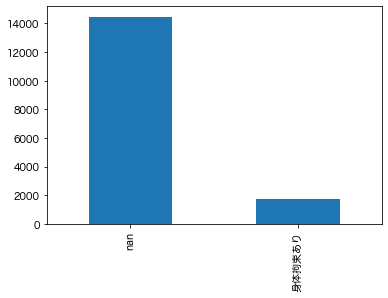

In [35]:
print(df.body_restraint.value_counts(dropna=False))
df.body_restraint.value_counts(dropna=False).plot.bar()

In [36]:
# to En
df.loc[df.body_restraint == '身体拘束あり', 'body_restraint'] = 'Yes'


In [37]:
# Yes→1、NaN→0
df.loc[df.body_restraint != 'Yes', ['body_restraint']] = 0
df.loc[df.body_restraint == 'Yes', ['body_restraint']] = 1

In [38]:
cols_category.append('body_restraint')
cols_numeric.remove('body_restraint')

## ambulance

NaN      14601
あり        1347
なし         112
ヘリ          87
不明          23
民間救急車        1
Name: ambulance, dtype: int64


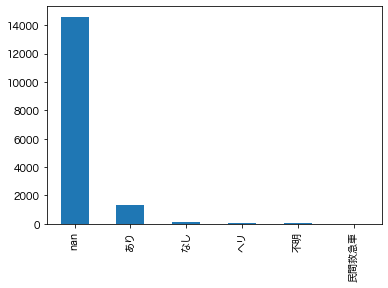

In [39]:
print(df.ambulance.value_counts(dropna=False))
df.ambulance.value_counts(dropna=False).plot.bar()

In [40]:
# to En
df.loc[df.ambulance == 'あり', 'ambulance'] = 'Yes'
df.loc[df.ambulance == 'なし', 'ambulance'] = 'No'
df.loc[df.ambulance == 'ヘリ', 'ambulance'] = 'helicopter'
df.loc[df.ambulance == '不明', 'ambulance'] = 'unknown'
df.loc[df.ambulance == '民間救急車', 'ambulance'] = 'Private_ambulance'


In [41]:
# add dummy variable
df_dummy = pd.get_dummies(df.ambulance, prefix='ambulance', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [42]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('ambulance')

## introduction

NaN           14611
なし              862
あり              685
不明                9
夜間救急診療所           1
市立青葉病院            1
君津中央病院            1
みつわ台総合病院より        1
Name: introduction, dtype: int64


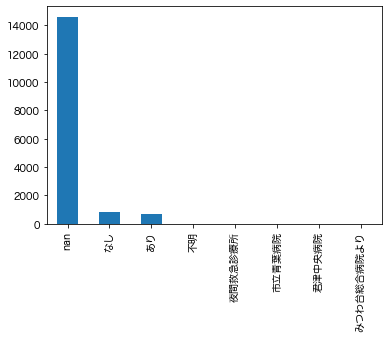

In [43]:
print(df.introduction.value_counts(dropna=False))
df.introduction.value_counts(dropna=False).plot.bar()

In [44]:
# to En
df.loc[df.introduction == 'あり', 'introduction'] = 'Yes'
df.loc[df.introduction == 'なし', 'introduction'] = 'No'
df.loc[df.introduction == '不明', 'introduction'] = 'unknown'


In [45]:
# hospital name -> Yes
df.loc[df.introduction == '市立青葉病院', ['introduction']] = 'Yes'
df.loc[df.introduction == '君津中央病院', ['introduction']] = 'Yes'
df.loc[df.introduction == 'みつわ台総合病院より', ['introduction']] = 'Yes'
df.loc[df.introduction == '夜間救急診療所', ['introduction']] = 'Yes'

# add dummy variable
df_dummy = pd.get_dummies(df.introduction, prefix='introduction', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [46]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('introduction')

## MET

NaN    9605
無      6304
有       262
Name: MET, dtype: int64


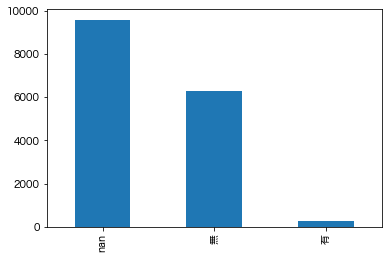

In [47]:
print(df.MET.value_counts(dropna=False))
df.MET.value_counts(dropna=False).plot.bar()

In [48]:
# to En
df.loc[df.MET == '有', 'MET'] = 'Yes'
df.loc[df.MET == '無', 'MET'] = 'No'


In [49]:
# add dummy variable
df_dummy = pd.get_dummies(df.MET, prefix='MET', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [50]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('MET')

## Ent_route

NaN               7746
C:手術後の予定入室        3538
A:外来から直接入室        2794
B-1:病室からの緊急入室      903
D:他院からの紹介          732
B-2:手術室からの緊急入室     352
E:外来から病棟入院         106
Name: Ent_route, dtype: int64


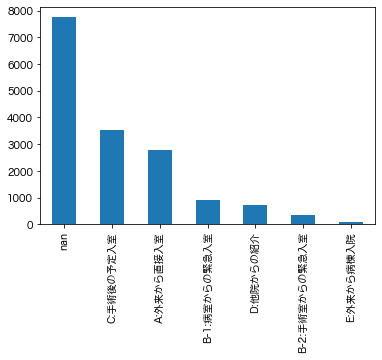

In [51]:
print(df.Ent_route.value_counts(dropna=False))
df.Ent_route.value_counts(dropna=False).plot.bar()

In [52]:
# code + name -> code
df.loc[df.Ent_route == 'A:外来から直接入室', ['Ent_route']] = 'A'
df.loc[df.Ent_route == 'B-1:病室からの緊急入室', ['Ent_route']] = 'B1'
df.loc[df.Ent_route == 'B-2:手術室からの緊急入室', ['Ent_route']] = 'B2'
df.loc[df.Ent_route == 'C:手術後の予定入室', ['Ent_route']] = 'C'
df.loc[df.Ent_route == 'D:他院からの紹介', ['Ent_route']] = 'D'
df.loc[df.Ent_route == 'E:外来から病棟入院', ['Ent_route']] = 'E'

# add dummy variable
df_dummy = pd.get_dummies(df.Ent_route, prefix='Ent_route', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [53]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Ent_route')

## AIDS

No     16164
Yes        7
Name: AIDS, dtype: int64


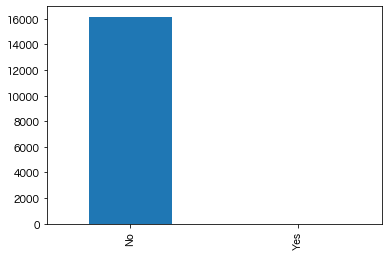

In [54]:
print(df.AIDS.value_counts(dropna=False))
df.AIDS.value_counts(dropna=False).plot.bar()

In [55]:
# add dummy variable
df_dummy = pd.get_dummies(df.AIDS, prefix='AIDS', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [56]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('AIDS')

## AML_MM

No     16132
Yes       39
Name: AML_MM, dtype: int64


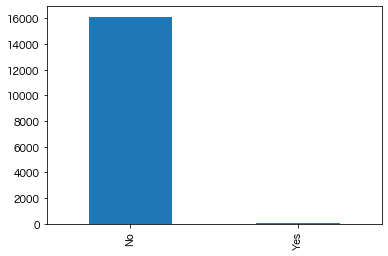

In [57]:
print(df.AML_MM.value_counts(dropna=False))
df.AML_MM.value_counts(dropna=False).plot.bar()

In [58]:
# add dummy variable
df_dummy = pd.get_dummies(df.AML_MM, prefix='AML_MM', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [59]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('AML_MM')

## Heart_failure

No     15581
Yes      590
Name: Heart_failure, dtype: int64


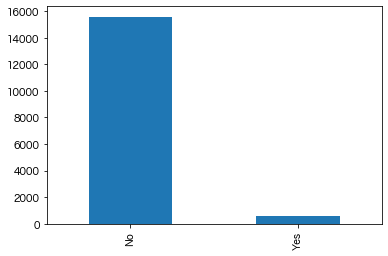

In [60]:
print(df.Heart_failure.value_counts(dropna=False))
df.Heart_failure.value_counts(dropna=False).plot.bar()

In [61]:
# add dummy variable
df_dummy = pd.get_dummies(df.Heart_failure, prefix='Heart_failure', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [62]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Heart_failure')

## Lymphoma

No     16138
Yes       33
Name: Lymphoma, dtype: int64


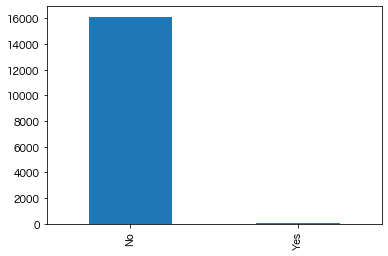

In [63]:
print(df.Lymphoma.value_counts(dropna=False))
df.Lymphoma.value_counts(dropna=False).plot.bar()

In [64]:
# add dummy variable
df_dummy = pd.get_dummies(df.Lymphoma, prefix='Lymphoma', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [65]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Lymphoma')

## Respiratory_failure

No     15477
Yes      694
Name: Respiratory_failure, dtype: int64


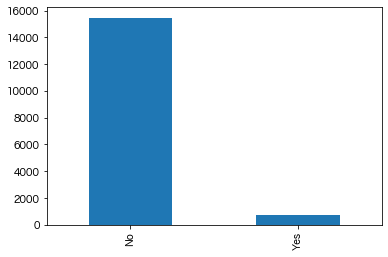

In [66]:
print(df.Respiratory_failure.value_counts(dropna=False))
df.Respiratory_failure.value_counts(dropna=False).plot.bar()

In [67]:
# add dummy variable
df_dummy = pd.get_dummies(df.Respiratory_failure, prefix='Respiratory_failure', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [68]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Respiratory_failure')

## Metastasis

No     16042
Yes      129
Name: Metastasis, dtype: int64


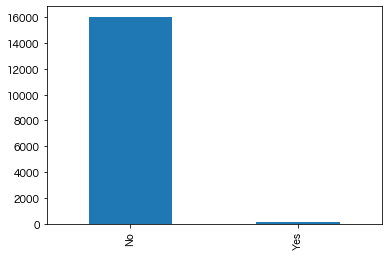

In [69]:
print(df.Metastasis.value_counts(dropna=False))
df.Metastasis.value_counts(dropna=False).plot.bar()

In [70]:
# add dummy variable
df_dummy = pd.get_dummies(df.Metastasis, prefix='Metastasis', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [71]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Metastasis')

## Liver_failure

No     16085
Yes       86
Name: Liver_failure, dtype: int64


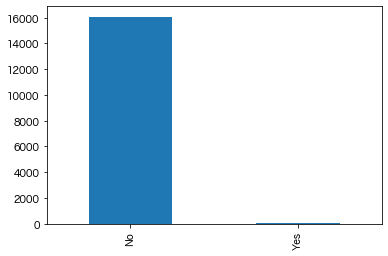

In [72]:
print(df.Liver_failure.value_counts(dropna=False))
df.Liver_failure.value_counts(dropna=False).plot.bar()

In [73]:
# add dummy variable
df_dummy = pd.get_dummies(df.Liver_failure, prefix='Liver_failure', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [74]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Liver_failure')

## Immunosuppression

No     15937
Yes      234
Name: Immunosuppression, dtype: int64


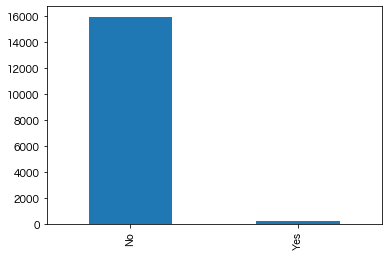

In [75]:
print(df.Immunosuppression.value_counts(dropna=False))
df.Immunosuppression.value_counts(dropna=False).plot.bar()

In [76]:
# add dummy variable
df_dummy = pd.get_dummies(df.Immunosuppression, prefix='Immunosuppression', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [77]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Immunosuppression')

## Cirrhosis

No     16119
Yes       52
Name: Cirrhosis, dtype: int64


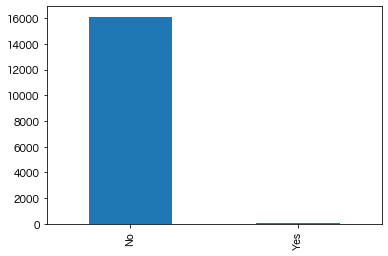

In [78]:
print(df.Cirrhosis.value_counts(dropna=False))
df.Cirrhosis.value_counts(dropna=False).plot.bar()

In [79]:
# add dummy variable
df_dummy = pd.get_dummies(df.Cirrhosis, prefix='Cirrhosis', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [80]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Cirrhosis')

## Maintenance_dialysis

No     15990
Yes      181
Name: Maintenance_dialysis, dtype: int64


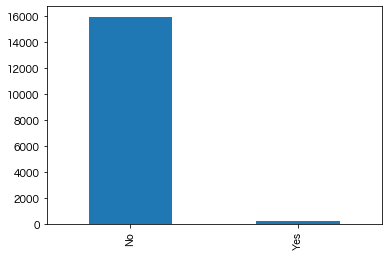

In [81]:
print(df.Maintenance_dialysis.value_counts(dropna=False))
df.Maintenance_dialysis.value_counts(dropna=False).plot.bar()

In [82]:
# add dummy variable
df_dummy = pd.get_dummies(df.Maintenance_dialysis, prefix='Maintenance_dialysis', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [83]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Maintenance_dialysis')

## Cardiac_arrest_resuscitation

No     15984
Yes      187
Name: Cardiac_arrest_resuscitation, dtype: int64


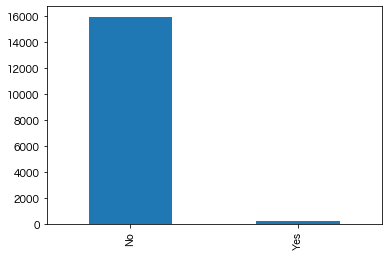

In [84]:
print(df.Cardiac_arrest_resuscitation.value_counts(dropna=False))
df.Cardiac_arrest_resuscitation.value_counts(dropna=False).plot.bar()

In [85]:
# add dummy variable
df_dummy = pd.get_dummies(df.Cardiac_arrest_resuscitation, prefix='Cardiac_arrest_resuscitation', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [86]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Cardiac_arrest_resuscitation')

## FIM_score

No     10182
0       5988
119        1
Name: FIM_score, dtype: int64


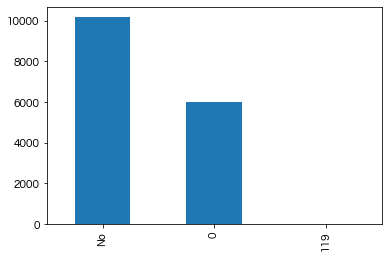

In [87]:
print(df.FIM_score.value_counts(dropna=False))
df.FIM_score.value_counts(dropna=False).plot.bar()

In [88]:
# add dummy variable
df_dummy = pd.get_dummies(df.FIM_score, prefix='FIM_score', dummy_na=False)
df = pd.concat([df, df_dummy], axis=1)

In [89]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('FIM_score')

## outcome1

転棟         12350
NaN         1430
退院           933
死亡(剖検無）      736
転院           585
死亡(剖検有)      137
Name: outcome1, dtype: int64


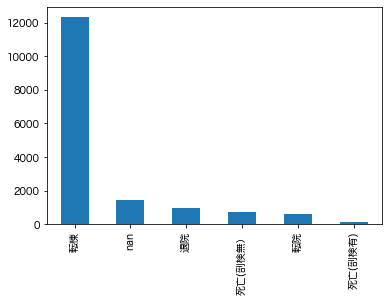

In [90]:
print(df.outcome1.value_counts(dropna=False))
df.outcome1.value_counts(dropna=False).plot.bar()

In [91]:
# to En
df.loc[df.outcome1 == '転棟', 'outcome1'] = 'Transfer building'
df.loc[df.outcome1 == '退院', 'outcome1'] = 'Discharge'
df.loc[df.outcome1 == '死亡(剖検無）', 'outcome1'] = 'Dead (no autopsy)'
df.loc[df.outcome1 == '転院', 'outcome1'] = 'Transfer'
df.loc[df.outcome1 == '死亡(剖検有)', 'outcome1'] = 'Dead (with autopsy)'


In [92]:
# add dummy variable
df_dummy = pd.get_dummies(df.outcome1, prefix='outcome1', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [93]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('outcome1')

## outcome2

軽快     9253
NaN    5061
不変     1036
死亡      621
治癒      124
転医       45
悪化       27
中止        4
Name: outcome2, dtype: int64


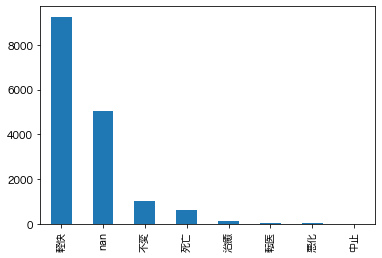

In [94]:
print(df.outcome2.value_counts(dropna=False))
df.outcome2.value_counts(dropna=False).plot.bar()

In [95]:
# to En
df.loc[df.outcome2 == '軽快', 'outcome2'] = 'Improved'
df.loc[df.outcome2 == '不変', 'outcome2'] = 'Did not change'
df.loc[df.outcome2 == '死亡', 'outcome2'] = 'Dead'
df.loc[df.outcome2 == '治癒', 'outcome2'] = 'Healing'
df.loc[df.outcome2 == '転医', 'outcome2'] = 'Transfer doctor'
df.loc[df.outcome2 == '悪化', 'outcome2'] = 'Deterioration'
df.loc[df.outcome2 == '中止', 'outcome2'] = 'Cancel'


In [96]:
# add dummy variable
df_dummy = pd.get_dummies(df.outcome2, prefix='outcome2', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [97]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('outcome2')

## Severity_of_sepsis

NaN           10886
0 敗血症なし        3764
2 重症敗血症         555
1 敗血症           488
3 敗血症性ショック      478
Name: Severity_of_sepsis, dtype: int64


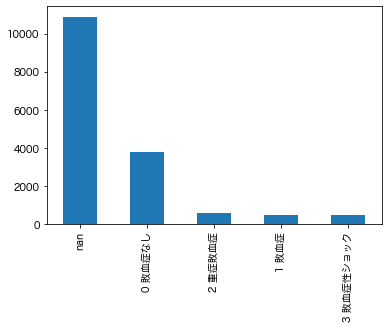

In [98]:
print(df.Severity_of_sepsis.value_counts(dropna=False))
df.Severity_of_sepsis.value_counts(dropna=False).plot.bar()

In [99]:
# to En
df.loc[df.Severity_of_sepsis == '0 敗血症なし', 'Severity_of_sepsis'] = '0 No sepsis'
df.loc[df.Severity_of_sepsis == '1 敗血症', 'Severity_of_sepsis'] = '1 Sepsis'
df.loc[df.Severity_of_sepsis == '2 重症敗血症', 'Severity_of_sepsis'] = '2 Severe sepsis'
df.loc[df.Severity_of_sepsis == '3 敗血症性ショック', 'Severity_of_sepsis'] = '3 Septic shock'


In [100]:
# add dummy variable
df_dummy = pd.get_dummies(df.outcome2, prefix='Severity_of_sepsis', dummy_na=True)
df = pd.concat([df, df_dummy], axis=1)

In [101]:
cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('Severity_of_sepsis')

## APTT

In [102]:
# for cols_numeric
df['APTT1'] = df.APTT.str.split('s', expand=True)[0]
df['APTT2'] = df.APTT.str.split('s', expand=True)[1]
cols_numeric.append('APTT1')
cols_numeric.append('APTT2')
cols_numeric.remove('APTT')

## ANISO

In [103]:
print(df.ANISO.value_counts(dropna=False))

# add dummy variable
df = pd.concat([df, pd.get_dummies(df.ANISO, prefix='ANISO', dummy_na=True)], axis=1)

NaN      14343
1+        1261
+-         505
0           25
1           19
ｷｬﾝｾﾙ       16
10           1
2+           1
Name: ANISO, dtype: int64


## request_to_clinical_laboratory

In [104]:
# cols_category.extend(df_dummy.columns.values)
cols_numeric.remove('request_to_clinical_laboratory')

## measurement_category

In [105]:
# do not use measurement_category
df.drop('measurement_category', axis=1, inplace=True)
cols_numeric.remove('measurement_category')

## axillary_temperature

In [106]:
#  correcting values
df.loc[df.axillary_temperature == 382.0, ['axillary_temperature']] = 38.2
df.loc[df.axillary_temperature == 336.5, ['axillary_temperature']] = 36.5
df.loc[df.axillary_temperature == 94.0, ['axillary_temperature']] = 39.4
df.loc[df.axillary_temperature == 3.0, ['axillary_temperature']] = np.nan

## Bed

In [107]:
cols_bed = []
for col in df.columns:
    if col.startswith('bed_'):
        cols_bed.append(col)
        cols_numeric.remove(col)

# Write File

In [108]:
df_category = df.loc[:, cols_category]
df_numeric = df.loc[:, cols_numeric]
df_bed = df.loc[:, cols_bed]

# change index to pID
index_cols = [df.pID, df.Ent_datetime]
df_category.index = index_cols
df_numeric.index = index_cols
df_bed.index = index_cols

# output csv
df_category.to_csv('../../../data/patient/patient_info_summarized_category4_{}.txt'.format(HOUR), sep='\t')
df_numeric.to_csv('../../../data/patient/patient_info_summarized_numeric4_{}.txt'.format(HOUR), sep='\t')
df_bed.to_csv('../../../data/patient/patient_info_summarized_bed4_{}.txt'.format(HOUR), sep='\t')
# df_category.drop_duplicates().to_csv('../../../data/patient/patient_info_summarized_category.txt', sep='\t')
# df_numeric.drop_duplicates().to_csv('../../../data/patient/patient_info_summarized_numeric.txt', sep='\t')

In [109]:
df_numeric[df_numeric.index.duplicated()]

,,Age,height,weight,days_of_stay,Accute_DIC,SOFA_score,apache2_score,apache2_est_mortality,SIRS_score,GOT,...,SVV(Vigileo),rSO2-1(INVOS),rSO2-2(INVOS),rSO2-3(INVOS),rSO2-4(INVOS),TBlood,SVV,ScvO2,APTT1,APTT2
pID,Ent_datetime,,,,,,,,,,,,,,,,,,,,,
nOWzDMmn,2011-04-22 13:35,79.0,145.0,38.3,0.0,No,No,No,No,No,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90bxVjZ3,2014-09-23 16:26,0.0,NaN,NaN,0.0,5,14,NaN,NaN,3,447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.5,2.8


In [110]:
print(len(df_numeric.drop_duplicates()))
print(len(df_numeric))

15746
16171


In [111]:
df_category.drop_duplicates()

,,Sex_F,Sex_M,Sex_nan,Blood_ABO_A,Blood_ABO_AB,Blood_ABO_B,Blood_ABO_O,Blood_ABO_other,Blood_ABO_t,Blood_ABO_nan,...,outcome2_Transfer doctor,outcome2_nan,Severity_of_sepsis_Cancel,Severity_of_sepsis_Dead,Severity_of_sepsis_Deterioration,Severity_of_sepsis_Did not change,Severity_of_sepsis_Healing,Severity_of_sepsis_Improved,Severity_of_sepsis_Transfer doctor,Severity_of_sepsis_nan
pID,Ent_datetime,,,,,,,,,,,,,,,,,,,,,
9AYeq8l9,2010-11-03 11:52,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2vKAer03,2010-11-03 13:14,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9RrpqrB9,2010-11-03 14:19,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ng4x4Kj9,2010-11-03 13:22,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
nq185Pxn,2010-11-03 13:37,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3QNXVDn,2019-03-30 17:33,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
37vywE02,2019-03-30 21:30,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9EDo4eEn,2019-03-30 22:02,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
